In [1]:
import wandb
import sys
import matplotlib.pyplot as plt
import scprep
import pandas as pd
sys.path.append('../dmae/src/')
from evaluate import get_results
from omegaconf import OmegaConf
from main import load_data, make_model
import numpy as np
import os
import glob
import scanpy as sc

In [2]:
os.chdir("../dmae/notebooks/")

# Initialize wandb (replace 'your_entity' and 'your_project' with your specific details)
wandb.login()
api = wandb.Api()

# Specify your entity, project, and sweep ID
entity = "xingzhis"
project = "dmae"
sweep_id = '1olp9ks4'

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

run_ids = [run.id for run in sweep.runs]
run_id = 'whgqtghz'
run = [run for run in sweep.runs if run.id == run_id][0]

cfg = OmegaConf.create(run.config)
folder_path = "../src/wandb/"
folder_list = glob.glob(f"{folder_path}*{run.id}*")
ckpt_files = glob.glob(f"{folder_list[0]}/files/*.ckpt")
ckpt_path = ckpt_files[0]
allloader, _, X, phate_coords, colors, dist, pp = load_data(cfg, load_all=True)
emb_dim = phate_coords.shape[1]
data_path = os.path.join(cfg.data.root, cfg.data.name + cfg.data.filetype)
data = np.load(data_path, allow_pickle=True)
dist_std = np.std(data['dist'].flatten())
model = make_model(cfg, X.shape[1], emb_dim, pp, dist_std, from_checkpoint=True, checkpoint_path=ckpt_path)
model.eval()
x_all = next(iter(allloader))['x']
x_pred, z_pred = model(x_all)
x_pred = x_pred.detach().cpu().numpy()
z_pred = z_pred.detach().cpu().numpy()

os.chdir("../../notebooks")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: xingzhis. Use `wandb login --relogin` to force relogin


<Axes: >

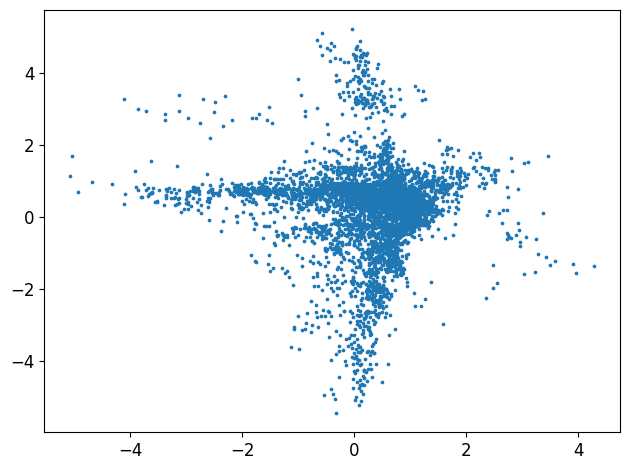

In [3]:
scprep.plot.scatter2d(z_pred)

In [4]:
np.save('ae_embedding.npy', z_pred)

In [2]:
os.chdir("../dmae/notebooks/")

# Initialize wandb (replace 'your_entity' and 'your_project' with your specific details)
wandb.login()
api = wandb.Api()

# Specify your entity, project, and sweep ID
entity = "xingzhis"
project = "dmae"
sweep_id = 'co8e8y4e'

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

run_ids = [run.id for run in sweep.runs]
run_id = 'xpoewpyd'
run = [run for run in sweep.runs if run.id == run_id][0]

cfg = OmegaConf.create(run.config)
folder_path = "../src/wandb/"
folder_list = glob.glob(f"{folder_path}*{run.id}*")
ckpt_files = glob.glob(f"{folder_list[0]}/files/*.ckpt")
ckpt_path = ckpt_files[0]
allloader, _, X, phate_coords, colors, dist, pp = load_data(cfg, load_all=True)
emb_dim = phate_coords.shape[1]
data_path = os.path.join(cfg.data.root, cfg.data.name + cfg.data.filetype)
data = np.load(data_path, allow_pickle=True)
dist_std = np.std(data['dist'].flatten())
model = make_model(cfg, X.shape[1], emb_dim, pp, dist_std, from_checkpoint=True, checkpoint_path=ckpt_path)
model.eval()
x_all = next(iter(allloader))['x']
x_pred, z_pred = model(x_all)
x_pred = x_pred.detach().cpu().numpy()
z_pred = z_pred.detach().cpu().numpy()

os.chdir("../../notebooks")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: xingzhis. Use `wandb login --relogin` to force relogin


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

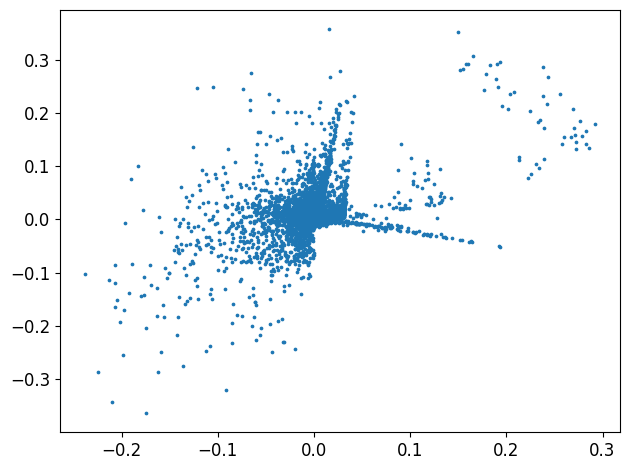

In [3]:
scprep.plot.scatter2d(z_pred)

In [4]:
np.save('ae_embedding_recon_only.npy', z_pred)